# Stock Kurtosis Chart

In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs

import warnings
warnings.filterwarnings("ignore")

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [2]:
start = '2020-01-01' #input
end = '2023-03-01' #input
symbol = '^NSEI'

In [3]:
df = yf.download("^NSEI", start, end)

[*********************100%***********************]  1 of 1 completed


In [4]:
returns = df['Adj Close'].pct_change()[1:].dropna()

In [5]:
def kurtosis(returns):
    stock_kurtosis = returns.kurtosis()
    return stock_kurtosis

Text(0, 0.5, 'Kurtosis')

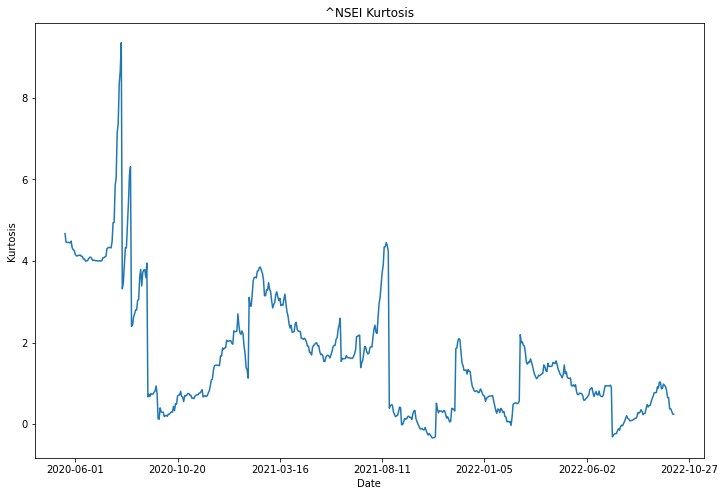

In [6]:
# Compute the running kurtosis
running = [kurtosis(returns[i-90:i]) for i in range(90, len(returns))]

# Plot running kurtosis up to 100 days before the end of the data set
_, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(range(90, len(returns)-100), running[:-100])
ticks = ax1.get_xticks()
ax1.set_xticklabels([df.index[int(i)].date() for i in ticks[:-1]]) # Label x-axis with dates
plt.title(symbol + ' Kurtosis')
plt.xlabel('Date')
plt.ylabel('Kurtosis')

In [7]:
kt = kurtosis(returns)
kt

15.64356081724966

In [8]:
running = [kurtosis(returns[i-90:i]) for i in range(90, len(returns))]
running

[4.670079062910222,
 4.460679676665753,
 4.457125085153446,
 4.452006840563138,
 4.452941907028081,
 4.442196007385705,
 4.485598060284525,
 4.323292332002037,
 4.270890656315693,
 4.258274170440168,
 4.159605114442314,
 4.125770571578701,
 4.119065564749067,
 4.1411669284377135,
 4.133962286676068,
 4.143809493851651,
 4.111315657468623,
 4.109331839782297,
 4.0440515596119315,
 4.0486392031766725,
 3.995963264244894,
 4.000401484612247,
 4.007066193323055,
 4.044121614394032,
 4.087086897562642,
 4.091857040015299,
 4.064082344570974,
 4.011003800687262,
 4.019444229083625,
 4.014570412894635,
 4.003887280521835,
 4.005543305021154,
 3.9993107020372243,
 3.998591854857203,
 4.007509994090842,
 3.9958214802061427,
 4.004235527081464,
 4.078795095524878,
 4.078343503053226,
 4.100875780016964,
 4.111192529366393,
 4.3020438768825855,
 4.31957040859555,
 4.332237506713377,
 4.325675605975695,
 4.31929237040797,
 4.464641152562027,
 4.9374552879999065,
 4.941375858661271,
 5.833522895757